In [84]:
import numpy as np
import matplotlib.pylab as plt


In [85]:
t = np.linspace(0, 15, 16)
signal = np.zeros(np.size(t) + 4)
print(signal)
signal[2:18] = 3+ np.sin((2*np.pi*t)/15)
print(signal)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.         0.         3.         3.40673664 3.74314483 3.95105652
 3.9945219  3.8660254  3.58778525 3.20791169 2.79208831 2.41221475
 2.1339746  2.0054781  2.04894348 2.25685517 2.59326336 3.
 0.         0.        ]


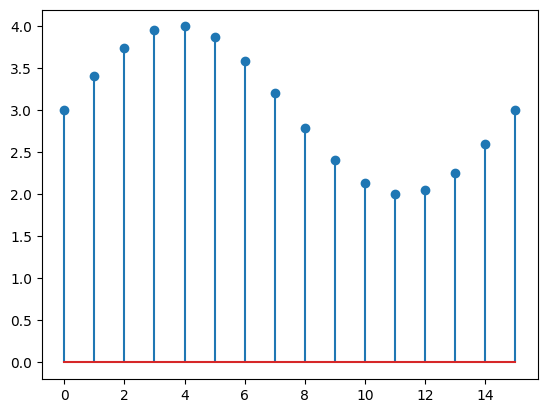

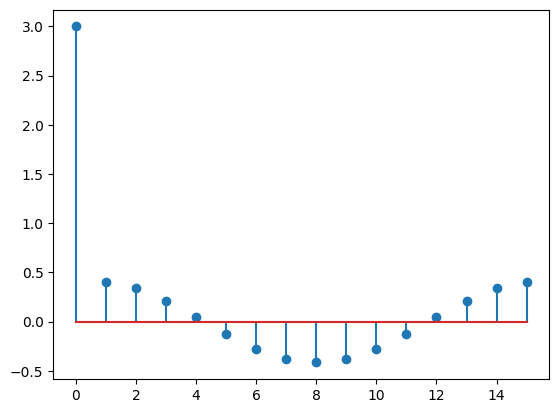

In [86]:
def answer_1a(signal):
  transformed_signal = np.zeros(np.size(signal))
  for t in np.arange(np.size(signal)-1):
    transformed_signal[t] = signal[t+1] - signal[t]
  return transformed_signal[1:17]

plt.stem(signal[2:18])
plt.show()
plt.stem(answer_1a(signal))
plt.show()


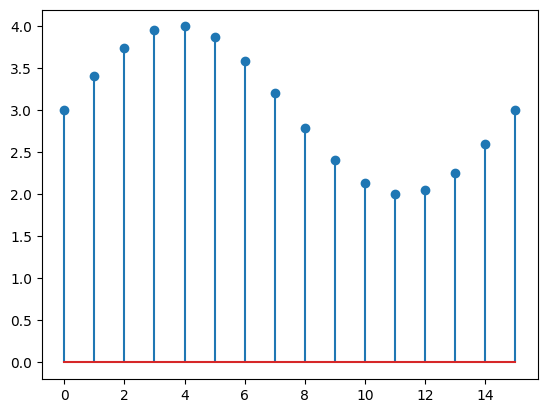

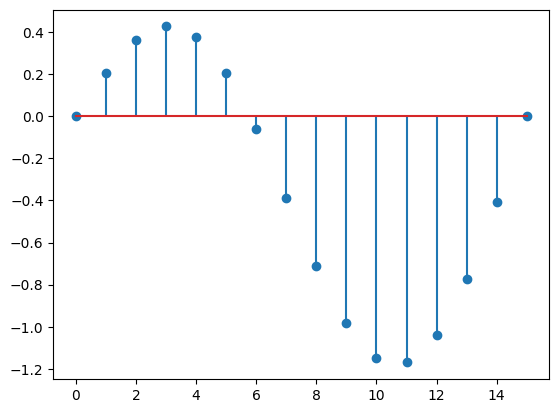

In [87]:
def find_mean(signal, end):
  if end < 2:
    return 0
  else:
    temp_arr = signal[2:end+1]
    return np.mean(temp_arr)

def answer_1b(signal):
  transformed_signal = np.zeros(np.size(signal))
  for t in np.arange(np.size(signal)-1):
    mean_signal = find_mean(signal, t)
    transformed_signal[t] = signal[t] - mean_signal
  return transformed_signal[2:18]

plt.stem(signal[2:18])
plt.show()
plt.stem(answer_1b(signal))
plt.show()

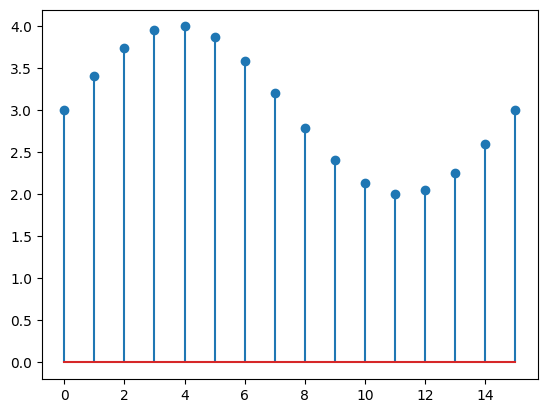

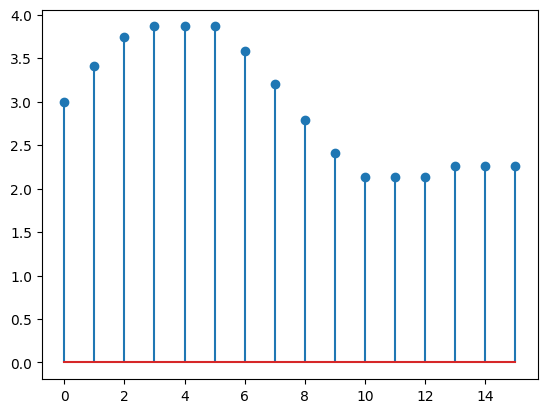

In [88]:
def find_median(signal, end):
  if end < 2:
    return 0
  else:
    temp_arr = signal[end - 2: end + 3]
    y = np.median(temp_arr, keepdims = True)
    return y

def answer_1c(signal):
  transformed_signal = np.zeros(np.size(signal))
  for t in np.arange(np.size(signal)-1):
    transformed_signal[t] = find_median(signal, t)
  return transformed_signal[2:18]

plt.stem(signal[2:18])
plt.show()
plt.stem(answer_1c(signal))
plt.show()

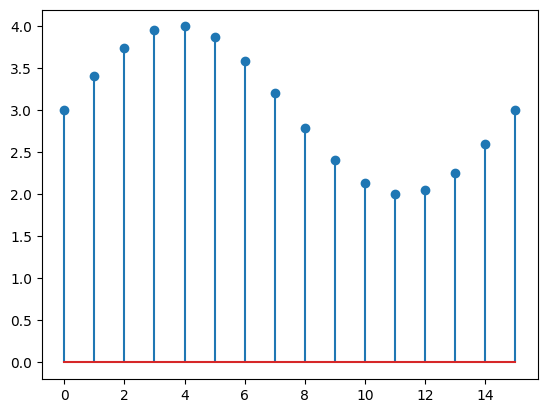

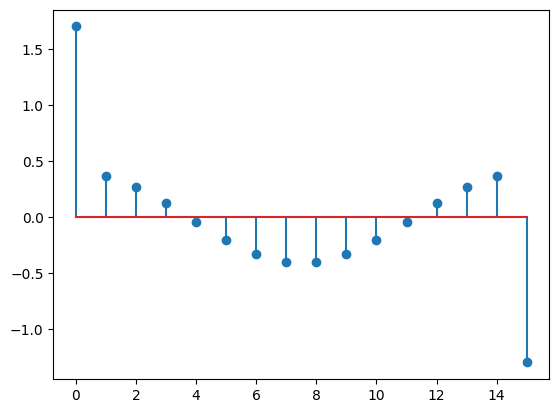

In [89]:
def find_interp(signal, end):
  if end < 1:
    return 0
  else:
    current = signal[end]
    pre = signal[end - 1]
    post = signal[end + 1]
    pre_interp = (current + pre)/2
    post_interp = (current + post)/2
    y = post_interp - pre_interp
    return y

def answer_1d(signal):
  transformed_signal = np.zeros(np.size(signal))
  for t in np.arange(np.size(signal)-1):
    transformed_signal[t] = find_interp(signal, t)
  return transformed_signal[2:18]

plt.stem(signal[2:18])
plt.show()
plt.stem(answer_1d(signal))
plt.show()

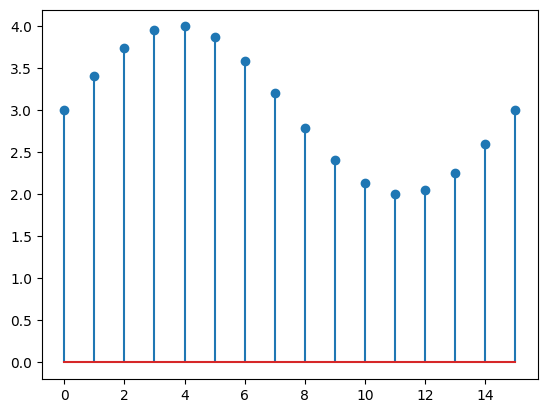

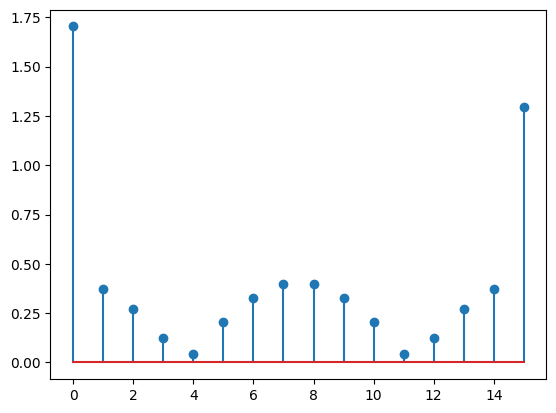

In [90]:
def find_mod_interp(signal, end):
  if end < 1:
    return 0
  else:
    current = signal[end]
    pre = signal[end - 1]
    post = signal[end + 1]
    pre_interp = (current + pre)/2
    post_interp = (current + post)/2
    y = post_interp - pre_interp
    if y < 0:
      y = -y;
    return y

def answer_1e(signal):
  transformed_signal = np.zeros(np.size(signal))
  for t in np.arange(np.size(signal)-1):
    transformed_signal[t] = find_mod_interp(signal, t)
  return transformed_signal[2:18]

plt.stem(signal[2:18])
plt.show()
plt.stem(answer_1e(signal))
plt.show()

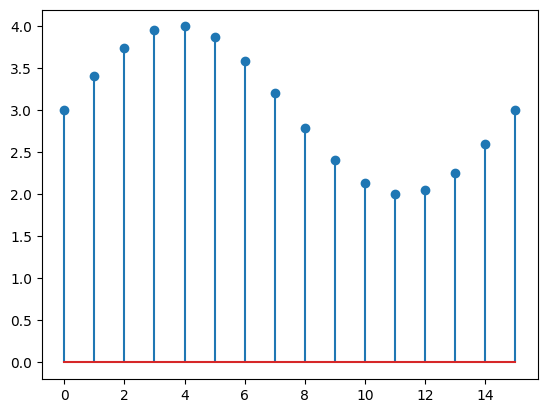

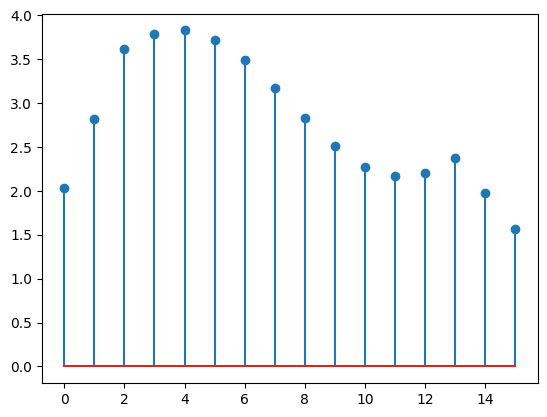

In [91]:
def find_five_avg(signal, end):
  if end < 2:
    return 0
  else:
    temp_arr = signal[end - 2: end + 3]
    y = np.mean(temp_arr)
    return y

def answer_1f(signal):
  transformed_signal = np.zeros(np.size(signal))
  for t in np.arange(np.size(signal)-1):
    transformed_signal[t] = find_five_avg(signal, t)
  return transformed_signal[2:18]

plt.stem(signal[2:18])
plt.show()
plt.stem(answer_1f(signal))
plt.show()

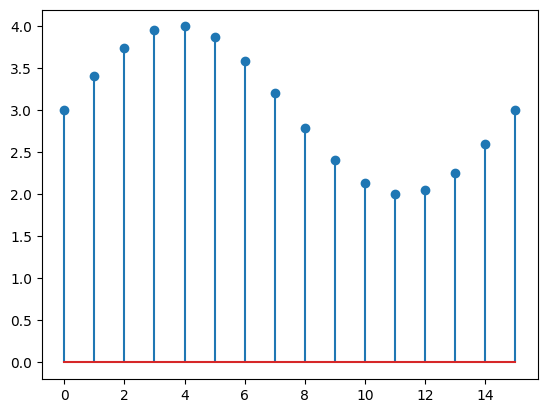

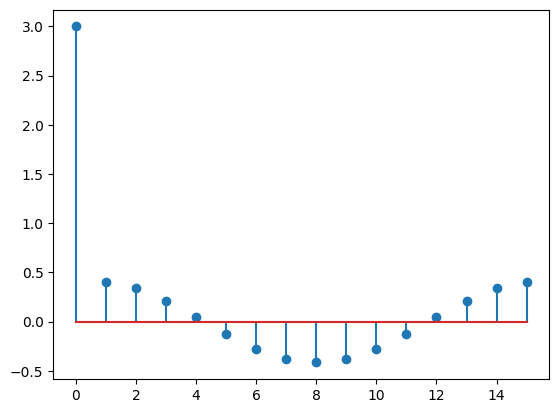

In [92]:
def convolution_1a(array):
  kernel_one = np.array([-1,1])
  output = np.zeros(np.size(array))
  padded_array = np.zeros(np.size(array)+2)
  padded_array[1:(np.size(array)+1)] = array
  for i in range(np.size(array)):
    output[i] = np.sum(kernel_one*padded_array[i:i+2])
  return output

x = signal[2:18]
out = convolution_1a(x)
  

plt.stem(x)
plt.show()
plt.stem(out)
plt.show()

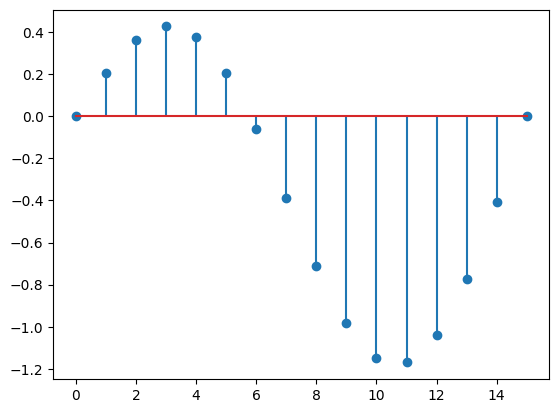

In [106]:
def convolution_1b(array, size):
  kernel_one = np.ones(size)
  output = np.zeros(size)
  padded_array = np.zeros((2*size)-1)
  padded_array[size-1:] = array
  for i in range(size):
    output[i] = array[i] - (np.sum(kernel_one*padded_array[i:i+size])/(i+1))
  return output

x = signal[2:18]
out = convolution_1b(x, 16)
  

plt.stem(out)
plt.show()

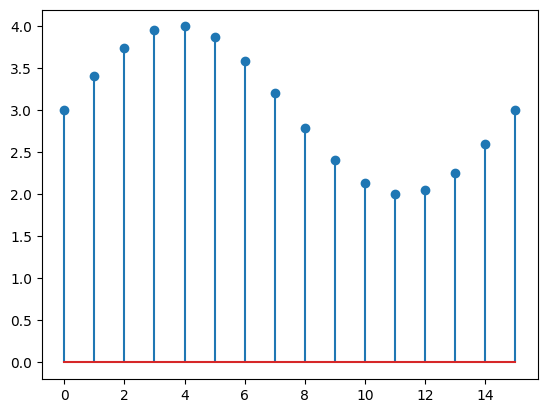

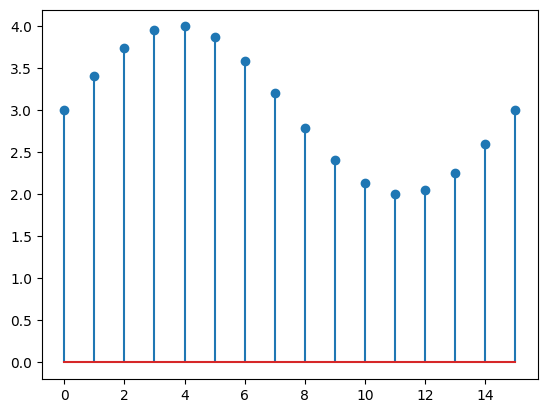

In [94]:
def convolution_1c(array, kernel_size):
  kernel_one = np.zeros(kernel_size)
  if kernel_size % 2 == 0:
    kernel_one[(kernel_size//2)-1] = 0.5
    kernel_one[(kernel_size//2)] = 0.5
  else:
    kernel_one[(kernel_size//2)] = 1
  padding = kernel_size // 2
  output = np.zeros(np.size(array))
  padded_array = np.zeros(np.size(array) + 2*padding)
  padded_array[padding:(np.size(array)+padding)] = array
  for i in range(np.size(array)):
    output[i] = np.sum(kernel_one*padded_array[i:i+kernel_size])
  return output

x = signal[2:18]
out = convolution_1c(x, 5)

plt.stem(x)
plt.show()
plt.stem(out)
plt.show()

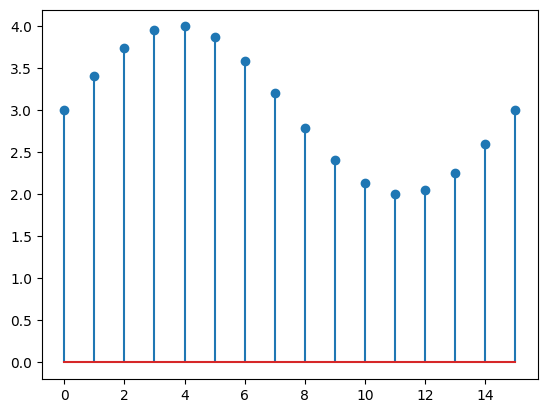

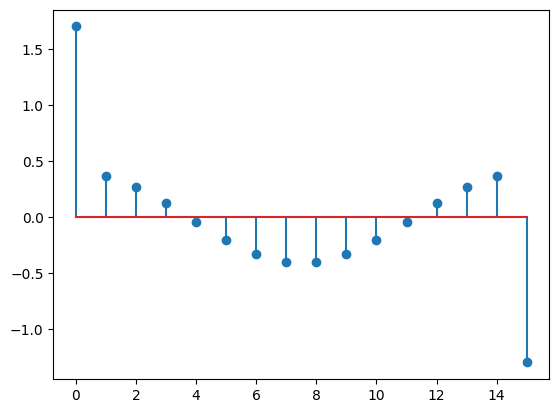

In [95]:
def convolution_1d(array):
  kernel_one = np.array([-0.5, 0, 0.5])
  padding = 1
  output = np.zeros(np.size(array))
  padded_array = np.zeros(np.size(array) + 2*padding)
  padded_array[padding:(np.size(array)+padding)] = array
  for i in range(np.size(array)):
    output[i] = np.sum(kernel_one*padded_array[i:i+3])
  return output

x = signal[2:18]
out = convolution_1d(x)

plt.stem(x)
plt.show()
plt.stem(out)
plt.show()

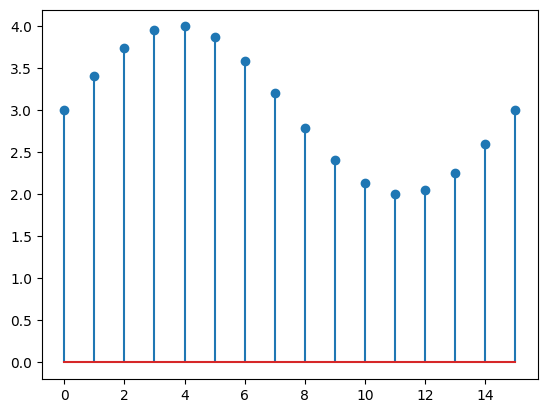

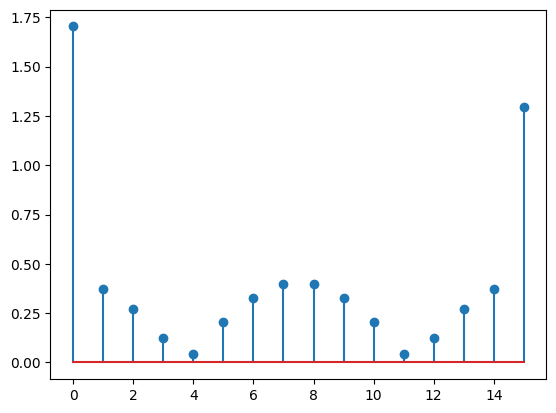

In [96]:
def convolution_1e(array):
  kernel_one = np.array([-0.5, 0, 0.5])
  padding = 1
  output = np.zeros(np.size(array))
  padded_array = np.zeros(np.size(array) + 2*padding)
  padded_array[padding:(np.size(array)+padding)] = array
  for i in range(np.size(array)):
    output[i] = np.sum(kernel_one*padded_array[i:i+3])
    if output[i] < 0:
        output[i] = -output[i]
  return output

x = signal[2:18]
out = convolution_1e(x)

plt.stem(x)
plt.show()
plt.stem(out)
plt.show()

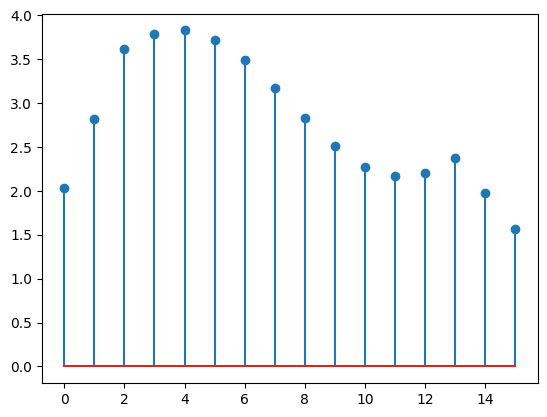

In [123]:
def convolution_1f(array, kernel_size):
  kernel_one = np.ones(kernel_size)*1.0/kernel_size  
  padding = (kernel_size - 1)//2
  output = np.zeros(np.size(array))
  padded_array = np.zeros(np.size(array) + 2*padding)
  padded_array[padding:(np.size(array)+padding)] = array
  for i in range(np.size(array)):
    output[i] = np.sum(kernel_one*padded_array[i:i+kernel_size])
    if output[i] < 0:
        output[i] = -output[i]
  return output

x = signal[2:18]
out = convolution_1f(x,5)

plt.stem(out)
plt.show()

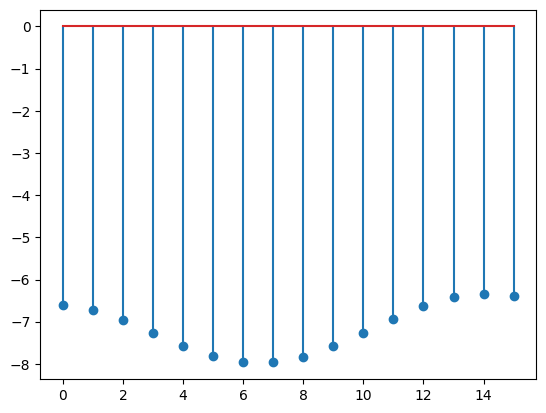

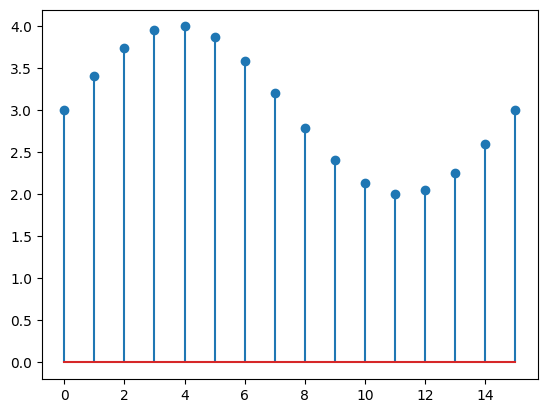

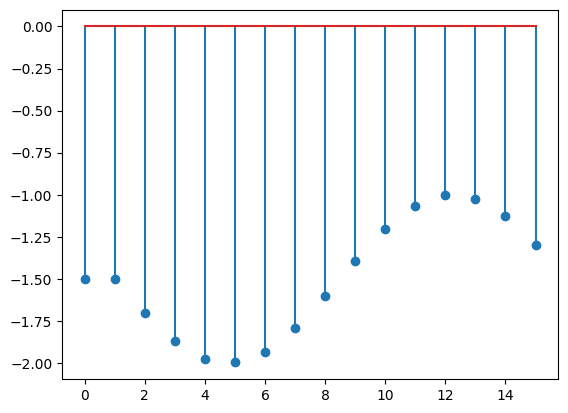

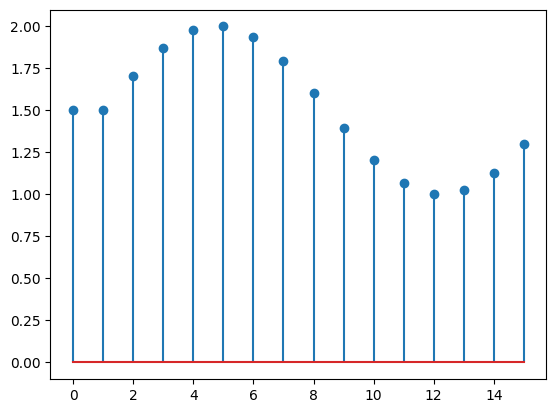

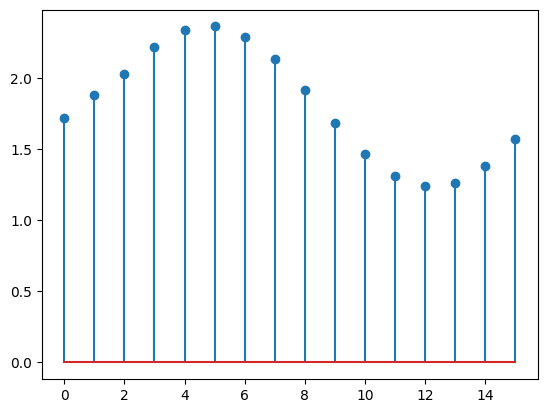

In [124]:
import scipy
from scipy.signal import lfilter
from numpy.fft import fft, ifft

def dirac(n):
    d = zeros(n)
    d[0] = 1
    return d

x = signal[2:18]
outb = convolution_1b(dirac(np.size(x)), np.size(x))
outc = convolution_1c(dirac(np.size(x)), 5)
outd = convolution_1d(dirac(np.size(x)))
oute = convolution_1e(dirac(np.size(x)))
outf = convolution_1f(dirac(np.size(x)), 5)

yb= np.real(ifft(np.multiply(fft(outb),fft(x))))
yc= np.real(ifft(np.multiply(fft(outc),fft(x))))
yd= np.real(ifft(np.multiply(fft(outd),fft(x))))
ye= np.real(ifft(np.multiply(fft(oute),fft(x))))
yf =np.real(ifft(np.multiply(fft(outf),fft(x))))


plt.stem(yb)
plt.show()
plt.stem(yc)
plt.show() 
plt.stem(yd)
plt.show() 
plt.stem(ye)
plt.show() 
plt.stem(yf)
plt.show() 